In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$\mu$ = $M_2$/{$M_1$ + $M_2$}   
$M_1$ + $M_2$ = 1$M_{sun}$  
$a_{bin}$ = 1 au   
G = 1  
$T_{p}$ = 2$\pi\sqrt[2]{a_{p}}^{3}$  
$v_{esc}$ = $\sqrt[2]\frac{2}{a_p}$   
$m_{planet}$ = $3*10^{-6}$$M_{sun}$

In [2]:
def setupSimulation(u, e, a_p, inc):
    #Initial Condition
    m1 = 1-u
    m2 = u
    m3 = 3e-6
    p=np.pi/2
    sim = rebound.Simulation()
    sim.add(m=m1)#Star A
    sim.add(m=m2, a=1., e=e)#Star B
    sim.add(m=m3, a=a_p, inc=inc) #Planet ABc
    sim.move_to_com()
    fig = rebound.OrbitPlot(sim,slices=0.8,xlim=[-5.,5],ylim=[-5.,5])# this is the initial state of orbit
    return sim

def aHW99(e, u):
    a = 1.6 + 5.1*e 
    -2.22*(e*e) + 4.12*u 
    -4.27*e*u - 5.09*(u*u) 
    +4.61*(e*e)*(u*u)
    return a

In [3]:
#Initial Condition
e = 0.4
u = 0.1
a_p = 0.93*aHW99(e, u)
#inc0 = 0.
inc1 = np.pi/3
inc2 = 2*inc1
#inc3 = 3*inc1
v_esc2 = 2/a_p # the square of v_escape
t = 2*np.pi*a_p*np.sqrt(a_p)

In [4]:
v_esc2

0.5908070424199456

/home/kong123/anaconda3/envs/py37/lib/python3.7/site-packages/rebound/plotting.py:81: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main)
/home/kong123/anaconda3/envs/py37/lib/python3.7/site-packages/rebound/plotting.py:83: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main)


unstable


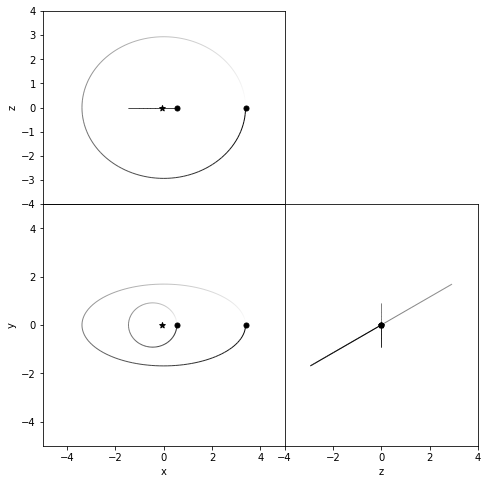

In [4]:
#inclination=60
#Simulation 
sim = setupSimulation(u, e, a_p, inc1)
Noutputs = 1000*4
times = np.linspace(0, 1000*t, Noutputs)
distances = np.zeros(Noutputs)
velocity2 = np.zeros(Noutputs)
ps = sim.particles # ps is now an array of pointers. It will update as the simulation ru
result = 0
for i, time in enumerate(times):
    sim.integrate(time)
    dp = ps[1] - ps[2]
    dv = ps[2]
    distances[i] = np.sqrt(dp.x*dp.x+dp.y*dp.y+dp.z*dp.z)
    velocity2[i] =  (dv.vx*dv.vx+dv.vy*dv.vy+dv.vz*dv.vz)
if max(velocity2) > v_esc2 or min(distances) < 1.:
    print('unstable')
else:
    print('stable')

y1=velocity2[:]

stable


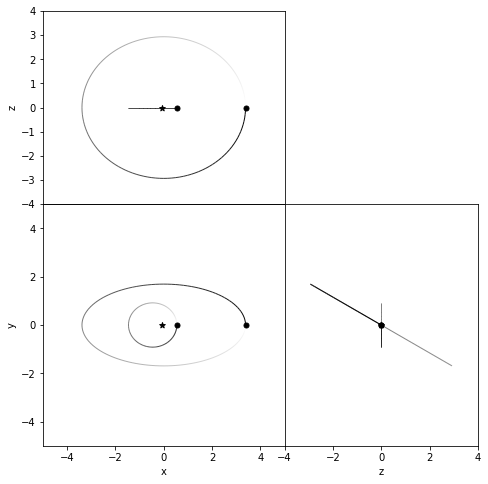

In [5]:
#inclination=120
#Simulation 
sim = setupSimulation(u, e, a_p, inc2)
Noutputs = 1000*4
times = np.linspace(0, 1000*t, Noutputs)
distances = np.zeros(Noutputs)
velocity2 = np.zeros(Noutputs)
ps = sim.particles # ps is now an array of pointers. It will update as the simulation ru
result = 0
for i, time in enumerate(times):
    sim.integrate(time)
    dp = ps[1] - ps[2]
    dv = ps[2]
    distances[i] = np.sqrt(dp.x*dp.x+dp.y*dp.y+dp.z*dp.z)
    velocity2[i] =  (dv.vx*dv.vx+dv.vy*dv.vy+dv.vz*dv.vz)
if max(velocity2) > v_esc2 or min(distances) < 1.:
    print('unstable')
else:
    print('stable')

y2=velocity2[:]

Text(0.8, 0.85, '$i=120^{o}$')

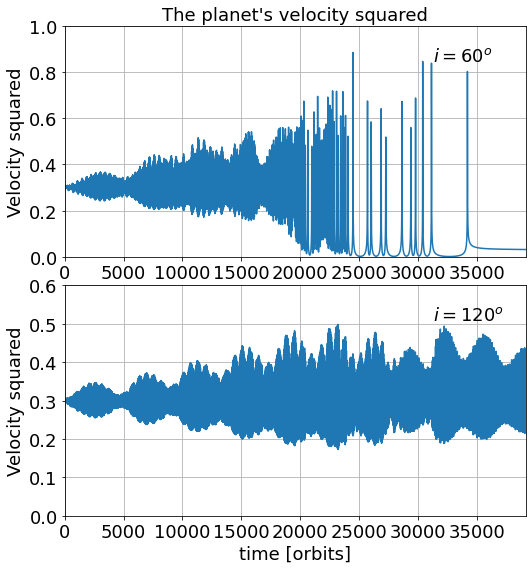

In [26]:
#figure2
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                  xlim=(0,1000*t), ylim=(0, 1)) # 左边10% 底部50% 宽80% 高40%
ax2 = fig.add_axes([0.1, 0.05, 0.8, 0.4],
                  xlim=(0,1000*t), ylim=(0, 0.6))
x =  times

ax1.plot(x, y1)
ax1.grid(True)
ax1.set_title("The planet's velocity squared",fontsize=18)
ax1.set_ylabel("Velocity squared", fontsize=18)
ax1.tick_params(labelsize=18)
ax1.text(0.8, 0.85, "$i=60^{o}$", transform=ax1.transAxes, fontsize=18)

ax2.plot(x, y2)
ax2.grid(True)
ax2.set_ylabel("Velocity squared", fontsize=18)
ax2.tick_params(labelsize=18)
ax2.set_xlabel("time [orbits]", fontsize=18)
ax2.text(0.8, 0.85, "$i=120^{o}$", transform=ax2.transAxes, fontsize=18)

In [14]:
import pandas as pd
data=[y1,y2]
df = pd.DataFrame(data).T
df

,0,1
0,0.295403,0.295403
1,0.298043,0.296243
2,0.310006,0.305750
3,0.296318,0.296852
4,0.296697,0.295836
...,...,...
3995,0.030788,0.312263
3996,0.030784,0.434312
3997,0.030780,0.255708
3998,0.030776,0.221814


In [16]:
df.to_csv('figure_2_data.csv')